In [46]:
if (getwd() == "/") setwd("/root")

In [1]:
yield <- function(xi1, xi2) {
  xi1 <- 3*xi1 - 15
  xi2 <- xi2/50 - 13
  xi1 <- cos(0.5)*xi1 - sin(0.5)*xi2
  xi2 <- sin(0.5)*xi1 + cos(0.5)*xi2
  y <- exp(-xi1^2/80 - 0.5*(xi2 + 0.03*xi1^2 - 40 *0.03)^2)
  return(100*y)
}


In [2]:
xi1 <- seq(1, 8, length=100)
xi2 <- seq(100, 1000, length=100)
g <- expand.grid(xi1, xi2)
y <- yield(g[,1], g[,2])


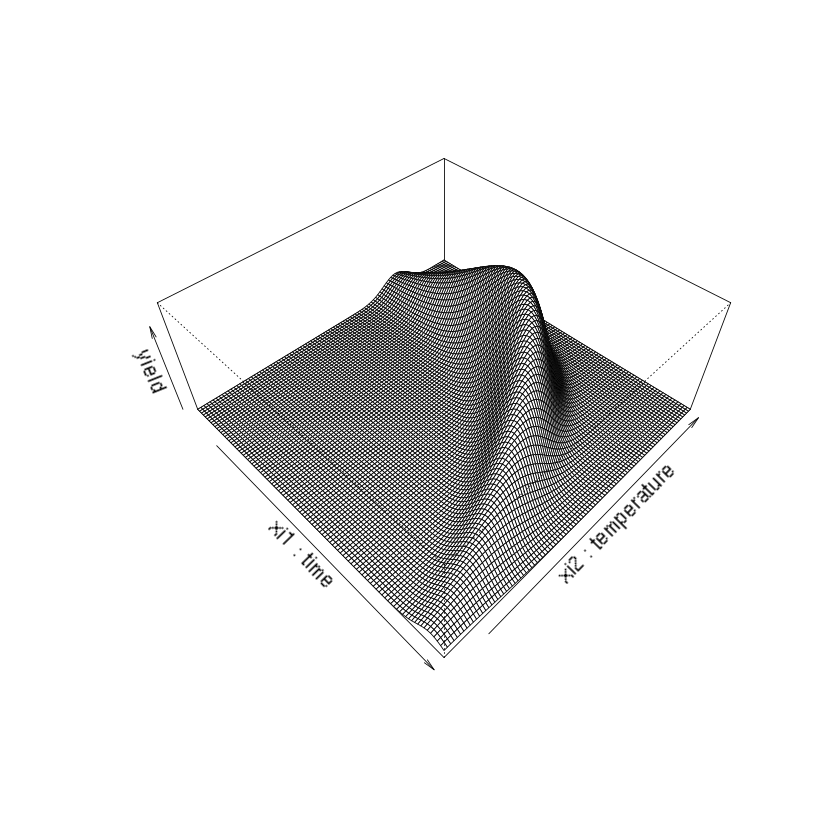

In [3]:
par(pty="s")
persp(xi1, xi2, matrix(y, ncol=length(xi2)), 
      theta=45, phi=45, lwd=0.5, 
      xlab="xi1 : time", ylab="xi2 : temperature", zlab="yield", 
      expand=0.4)


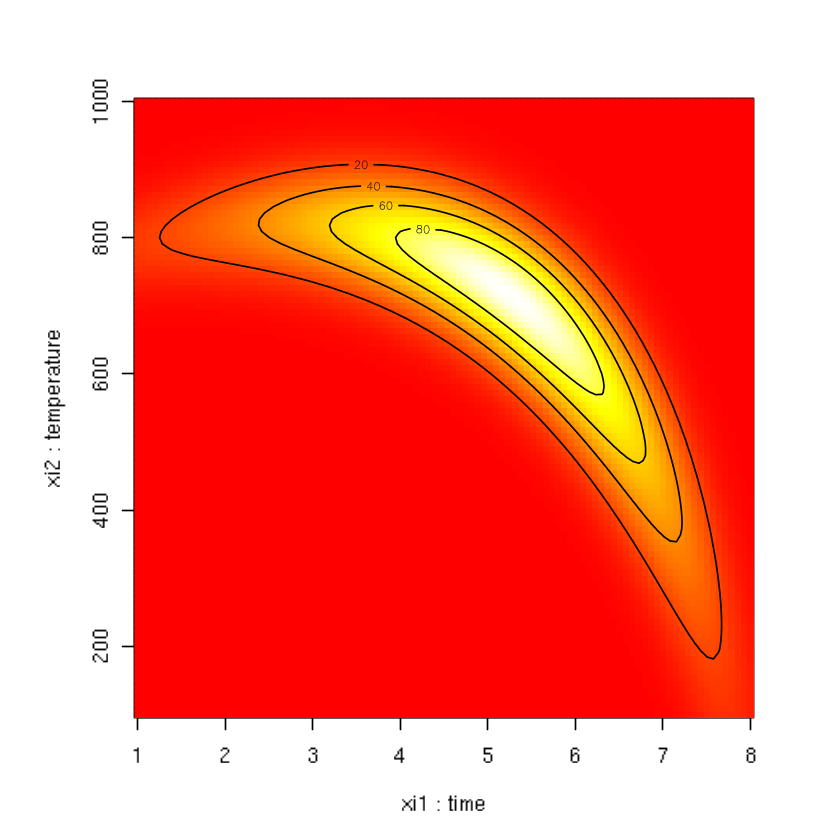

In [4]:
par(pty="s")
cols <- heat.colors(128)
image(xi1, xi2, matrix(y, ncol=length(xi2)), col=cols,
      xlab="xi1 : time", ylab="xi2 : temperature")
contour(xi1, xi2, matrix(y, ncol=length(xi2)), nlevels=4, add=TRUE)


In [5]:
first.order <- function(x1, x2) {
  50 + 8*x1 + 3*x2
}


In [6]:
x1 <- x2 <- seq(-1, 1, length=100)
g <- expand.grid(x1, x2)
eta1 <- matrix(first.order(g[,1], g[,2]), ncol=length(x2))


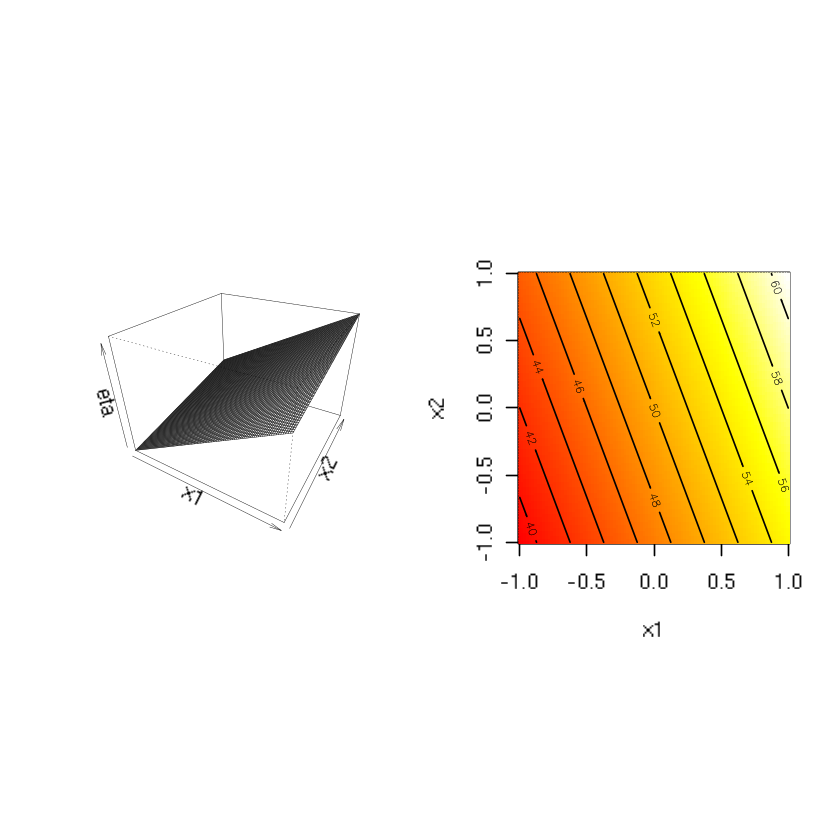

In [7]:
par(mfrow=c(1, 2), pty="s")
persp(x1, x2, eta1, theta=30, phi=30, zlab="eta", expand=0.75, lwd=0.25)
image(x1, x2, eta1, col=heat.colors(128))
contour(x1, x2, matrix(eta1, ncol=length(x2)), add=TRUE)


In [8]:
first.order.i <- function(x1, x2) {
  50 + 8*x1 + 3*x2 - 4*x1*x2
}


In [9]:
eta1i <- matrix(first.order.i(g[,1], g[,2]), ncol=length(x2))



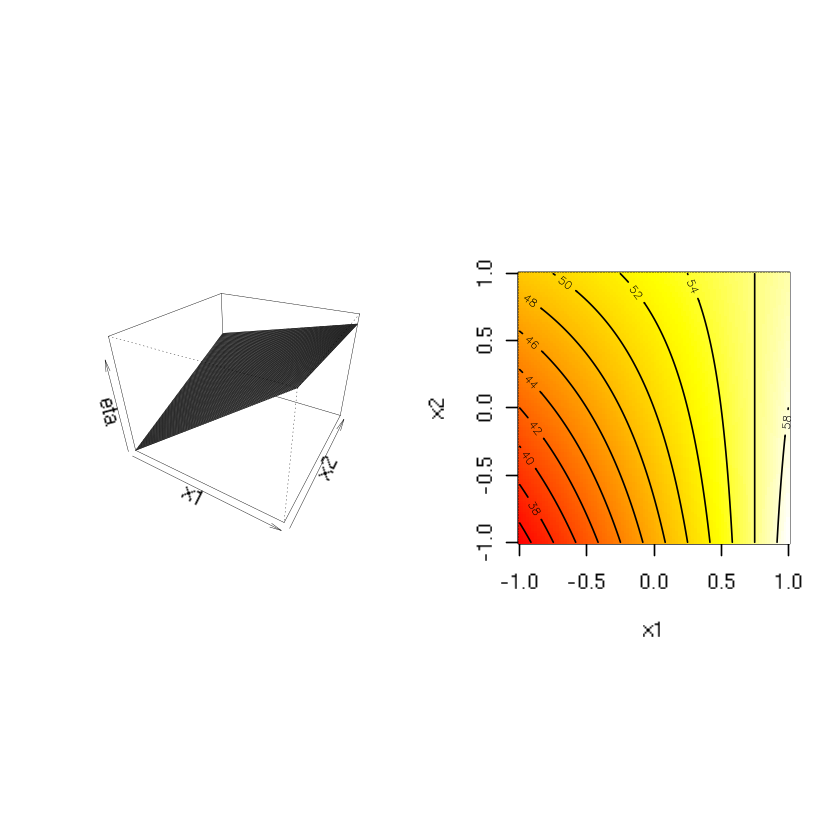

In [10]:
par(mfrow=c(1, 2), pty="s")
persp(x1, x2, eta1i, theta=30, phi=30, zlab="eta", expand=0.75, lwd=0.25)
image(x1, x2, eta1i, col=heat.colors(128))
contour(x1, x2, eta1i, add=TRUE)


In [11]:
simple.max <- function(x1, x2) {
  50 + 8*x1 + 3*x2 - 7*x1^2 - 3*x2^2 - 4*x1*x2
}


In [12]:
eta2sm <- matrix(simple.max(g[,1], g[,2]), ncol=length(x2))



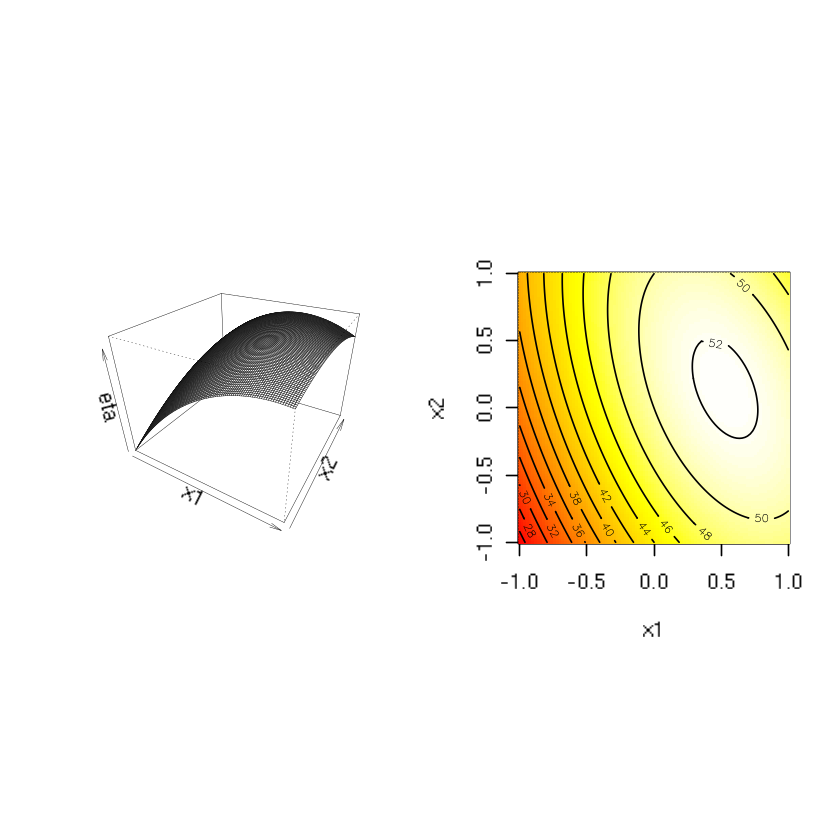

In [13]:
par(mfrow=c(1,2), pty="s")
persp(x1, x2, eta2sm, theta=30, phi=30, zlab="eta", expand=0.75, lwd=0.25)
image(x1, x2, eta2sm, col=heat.colors(128))
contour(x1, x2, eta2sm, add=TRUE)


In [14]:
stat.ridge <- function(x1, x2) {
  80 + 4*x1 + 8*x2 - 3*x1^2 - 12*x2^2 - 12*x1*x2
}


In [15]:
eta2sr <- matrix(stat.ridge(g[,1], g[,2]), ncol=length(x2))



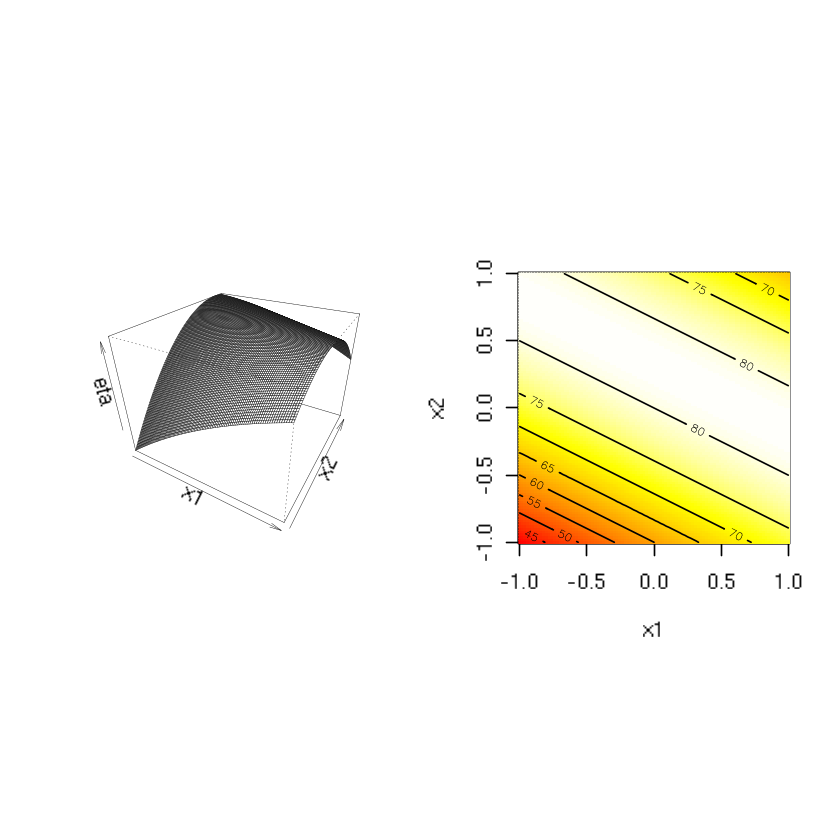

In [16]:
par(mfrow=c(1,2), pty="s")
persp(x1, x2, eta2sr, theta=30, phi=30, zlab="eta", expand=0.75, lwd=0.25)
image(x1, x2, eta2sr, col=heat.colors(128))
contour(x1, x2, eta2sr, add=TRUE)


In [17]:
rise.ridge <- function(x1, x2) {
  80 - 4*x1 + 12*x2 - 3*x1^2 - 12*x2^2 - 12*x1*x2
}


In [18]:
eta2rr <- matrix(rise.ridge(g[,1], g[,2]), ncol=length(x2))



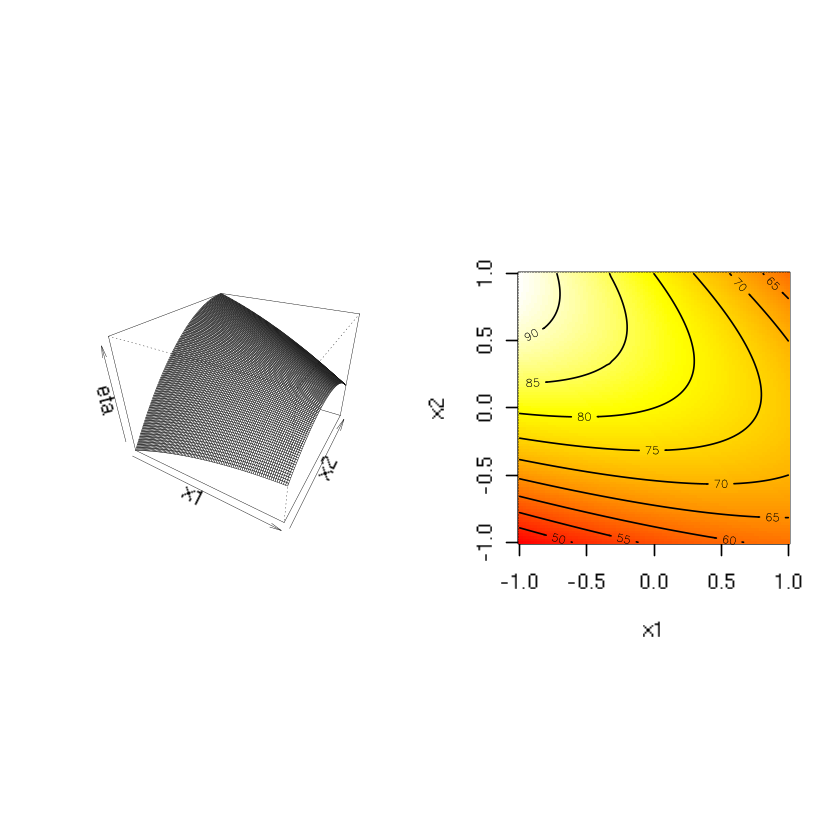

In [19]:
par(mfrow=c(1,2), pty="s")
persp(x1, x2, eta2rr, theta=30, phi=30, zlab="eta", expand=0.75, lwd=0.25)
image(x1, x2, eta2rr, col=heat.colors(128))
contour(x1, x2, eta2rr, add=TRUE)


In [20]:
saddle <- function(x1, x2) {
  80 + 4*x1 + 8*x2 - 2*x1 - 12*x2 - 12*x1*x2 
}


In [21]:
eta2s <- matrix(saddle(g[,1], g[,2]), ncol=length(x2))



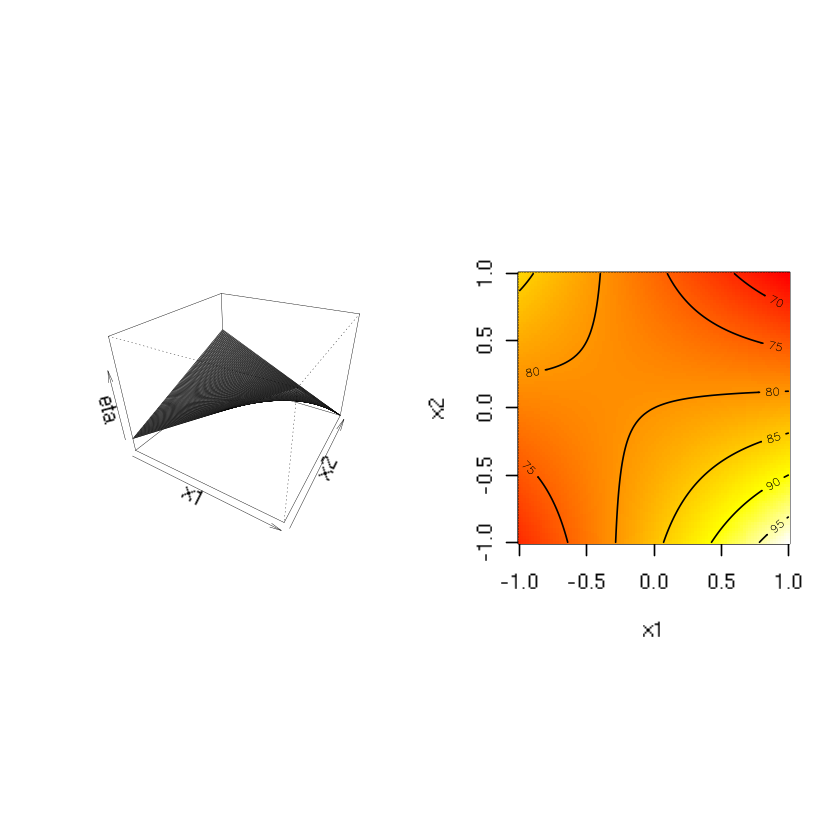

In [22]:
par(mfrow=c(1, 2), pty="s")
persp(x1, x2, eta2s, theta=30, phi=30, zlab="eta", expand=0.75, lwd=0.25)
image(x1, x2, eta2s, col=heat.colors(128))
contour(x1, x2, eta2s, add=TRUE)


In [23]:
wingwt <- function(Sw=0.48, Wfw=0.4, A=0.38, L=0.5, q=0.62, l=0.344, 
  Rtc=0.4, Nz=0.37, Wdg=0.38) {
  ## put coded inputs back on natural scale
  Sw <- Sw*(200 - 150) + 150 
  Wfw <- Wfw*(300 - 220) + 220 
  A <- A*(10 - 6) + 6 
  L <- (L*(10 - (-10)) - 10) * pi/180
  q <- q*(45 - 16) + 16 
  l <- l*(1 - 0.5) + 0.5 
  Rtc <- Rtc*(0.18 - 0.08) + 0.08
  Nz <- Nz*(6 - 2.5) + 2.5
  Wdg <- Wdg*(2500 - 1700) + 1700

  ## calculation on natural scale
  W <- 0.036*Sw^0.758 * Wfw^0.0035 * (A/cos(L)^2)^0.6 * q^0.006 
  W <- W * l^0.04 * (100*Rtc/cos(L))^(-0.3) * (Nz*Wdg)^(0.49)
  return(W)
}


In [24]:
x <- seq(0, 1, length=100)
g <- expand.grid(x, x)
W.A.Nz <- wingwt(A=g[,1], Nz=g[,2])


In [25]:
cs <- heat.colors(128)
bs <- seq(min(W.A.Nz), max(W.A.Nz), length=129)


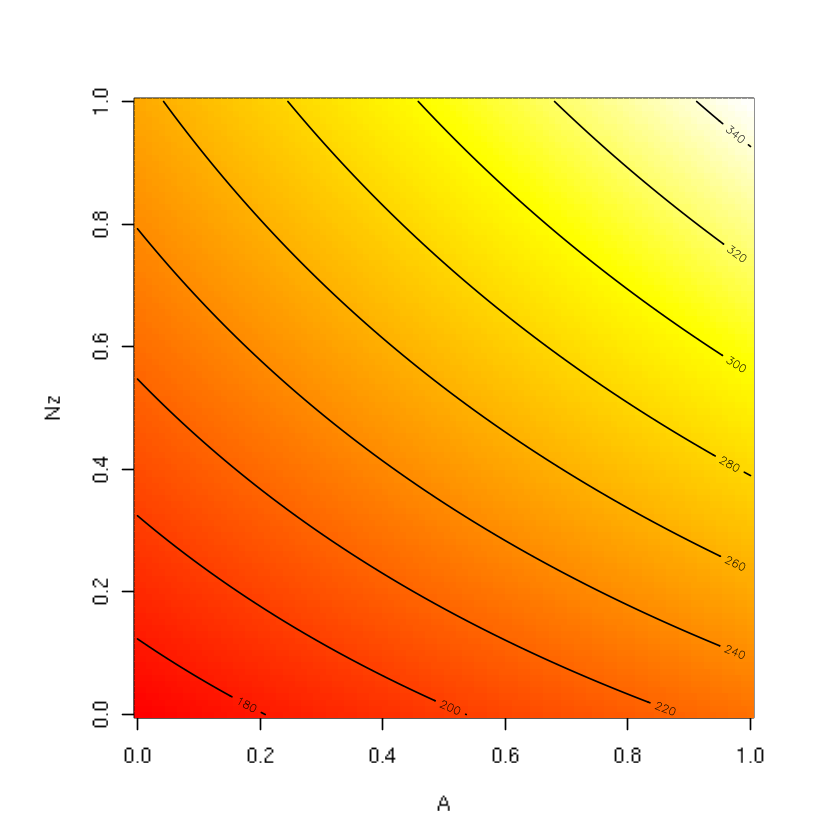

In [26]:
par(pty="s")
image(x, x, matrix(W.A.Nz, ncol = length(x)), col=cs, breaks=bs, xlab="A", ylab="Nz")
contour(x, x, matrix(W.A.Nz, ncol=length(x)), add=TRUE)


In [27]:
W.l.Wfw <- wingwt(l=g[,1], Wfw=g[,2])



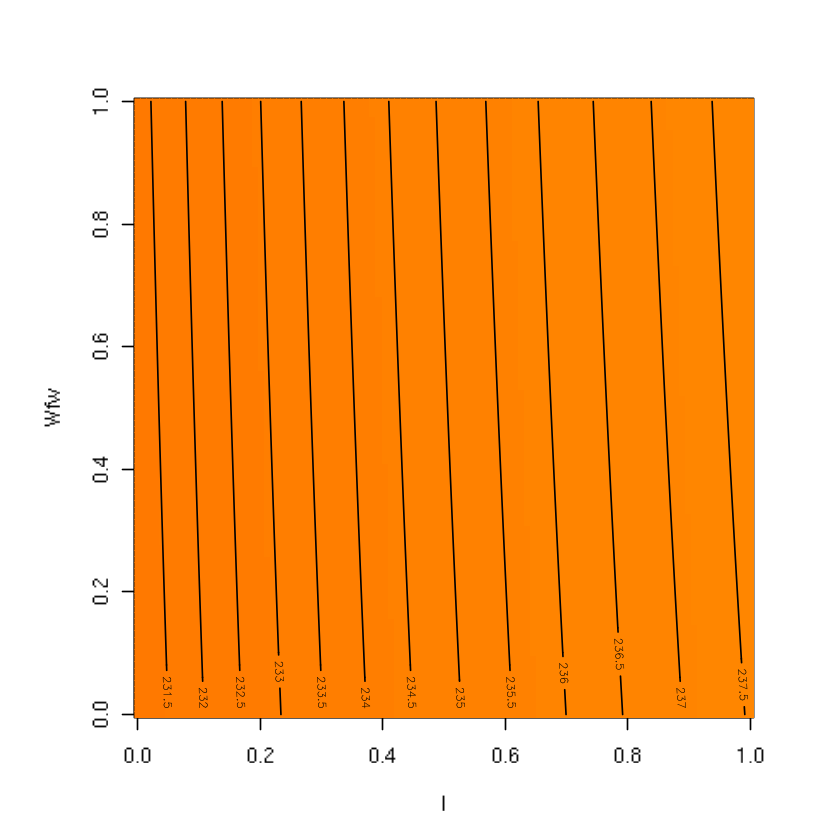

In [28]:
par(pty="s")
image(x, x, matrix(W.l.Wfw,ncol=length(x)), col=cs, breaks=bs, 
  xlab="l", ylab="Wfw")
contour(x,x, matrix(W.l.Wfw,ncol=length(x)), add=TRUE)


In [29]:
library(lhs)
n <- 1000
X <- data.frame(randomLHS(n, 9))
names(X) <- names(formals(wingwt))
X


Sw,Wfw,A,L,q,l,Rtc,Nz,Wdg
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.859768447,0.07364620,0.02251921,0.844102633,0.76640096,0.078532901,0.40445380,0.25887591,0.50122550
0.003561609,0.10060059,0.13916594,0.824260761,0.11383168,0.277875824,0.54686597,0.78331004,0.01065524
0.228299165,0.19012673,0.90674350,0.081414921,0.10976672,0.953385463,0.67203517,0.24462778,0.63327723
0.620162898,0.58495378,0.28594098,0.443273624,0.07632087,0.625088200,0.68528017,0.05714978,0.33846562
0.952025341,0.98884092,0.43241509,0.226366816,0.52997794,0.163184410,0.86233918,0.82294711,0.54414416
0.991050963,0.15576506,0.19999572,0.415534726,0.99513791,0.766040921,0.03092438,0.83326031,0.25149068
0.907681548,0.05077835,0.03840565,0.123176087,0.63516295,0.483365408,0.60588627,0.88048960,0.18970305
0.096182930,0.26814021,0.92031566,0.709079281,0.19901295,0.002289492,0.30230660,0.39489503,0.15643959
0.660381420,0.11091184,0.38965168,0.966652183,0.19701792,0.907551588,0.98384124,0.71428533,0.31456178


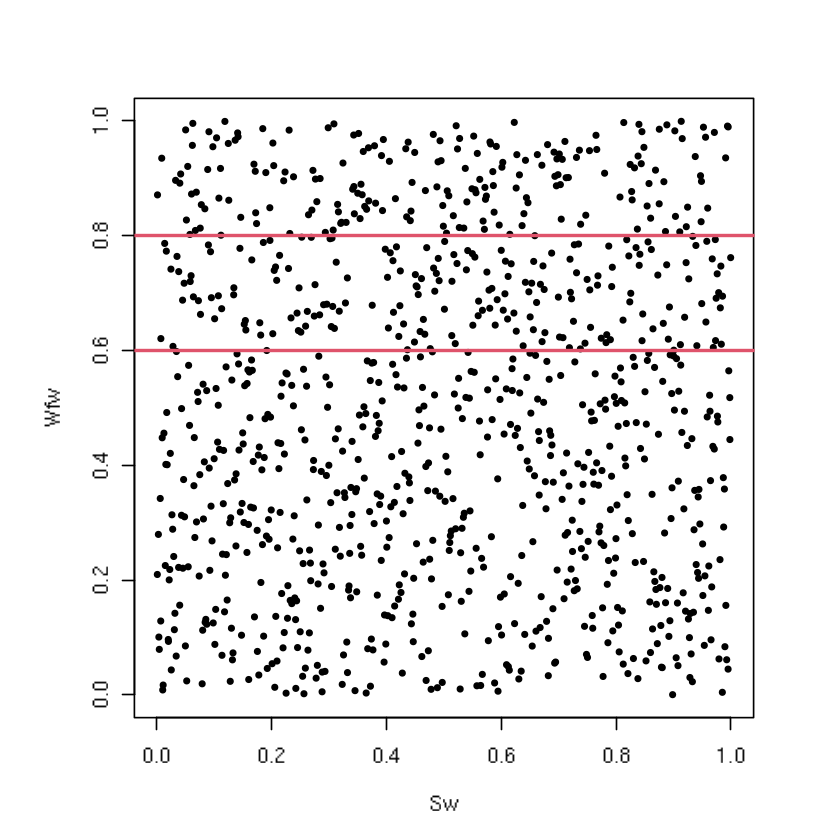

In [30]:
par(pty="s")
plot(X[,1:2], pch=19, cex=0.5)
abline(h=c(0.6, 0.8), col=2, lwd=2)


In [31]:
inbox <- X[,1] > 0.6 & X[,1] < 0.8
sum(inbox)/nrow(X)


[1] 0.2

In [32]:
Y <- wingwt(X[,1], X[,2], X[,3], X[,4], X[,5], X[,6], X[,7], X[,8], X[,9])
Y


[1] 215.7217 201.6498 242.9458 184.8068 290.2275 320.4983 253.8457 243.8515
   [9] 250.2595 290.6712 228.9118 317.2557 295.7276 235.8548 236.9544 270.4679
  [17] 278.6145 312.9095 400.5617 377.0484 322.8548 353.3852 326.5332 272.2854
  [25] 184.7133 304.4158 241.2104 233.5727 297.7265 294.1180 202.2468 285.3943
  [33] 180.5838 213.1409 197.6792 180.9512 297.3935 289.3227 299.9973 283.8772
  [41] 234.6955 186.9172 306.7063 290.6966 233.3225 299.4123 351.1800 216.2779
  [49] 302.6072 321.4580 192.6545 266.6646 256.6459 251.7497 282.3609 246.9358
  [57] 331.6278 246.1932 198.5620 215.4614 224.5636 214.0651 259.4164 299.1570
  [65] 331.2933 252.7563 239.8889 234.9027 359.8246 235.3010 331.4349 213.3810
  [73] 307.8027 262.3361 266.1459 234.2302 286.0622 348.4209 246.8304 267.3528
  [81] 346.9057 209.4615 213.7032 225.3791 217.5574 203.8284 264.1568 187.7987
  [89] 191.7820 260.1135 260.0738 292.5726 281.5568 272.1112 346.2533 192.7197
  [97] 279.4276 250.3433 253.2619 255.9007 288.3512 225.3862 269.0362 283.7549
 [105] 288.1130 293.8184 240.8946 239.9561 229.7830 192.8338 216.5441 223.1880
 [113] 260.5122 298.5541 199.5783 230.7317 207.6544 225.4248 253.5566 230.9677
 [121] 227.6876 289.5776 246.7087 294.9462 272.1333 274.8573 229.7024 238.6789
 [129] 277.7893 206.7653 355.4762 245.9851 271.3902 262.7588 245.4137 285.0832
 [137] 217.0705 245.0651 256.1560 270.3889 309.1467 182.3308 375.4707 271.7650
 [145] 188.9766 251.3149 270.7103 214.3063 217.5219 312.8046 174.4161 303.7331
 [153] 209.0438 228.8229 282.3932 272.4329 236.5657 315.0072 211.7609 240.4446
 [161] 207.8179 245.2609 251.4412 259.7137 216.7149 202.8688 358.9895 246.3687
 [169] 240.3228 298.5062 254.7512 319.6663 209.4208 292.8914 290.2811 207.0926
 [177] 249.2302 207.4904 238.0141 284.5063 231.0549 307.8691 284.2029 228.7061
 [185] 254.6168 274.7808 309.2628 234.5585 202.8250 359.2069 220.1987 345.5968
 [193] 212.5435 244.2286 280.7381 286.4172 324.3463 324.9807 208.3414 220.8456
 [201] 226.9906 175.2070 282.6800 223.0820 214.8641 214.3815 211.7023 220.8354
 [209] 242.6602 277.9846 182.7680 235.3294 289.5343 297.9429 255.2530 282.3303
 [217] 229.6893 238.0971 252.6618 248.1831 266.9115 343.1151 225.3683 228.0020
 [225] 291.4245 275.8390 247.2719 239.9741 361.4152 248.6027 296.0796 194.4819
 [233] 302.0507 280.0735 311.4592 199.0276 305.0554 326.9515 189.8867 300.6999
 [241] 154.1419 248.3732 280.4451 242.1302 225.5311 210.6682 408.0127 232.4788
 [249] 263.4974 269.3533 240.4837 232.6858 218.5893 310.8968 211.5461 308.2968
 [257] 237.6320 340.2063 246.8692 276.2845 343.9422 257.7453 230.4833 281.4098
 [265] 305.7107 260.2903 344.0499 199.6690 337.4304 266.0144 252.3468 356.8578
 [273] 313.1590 248.1865 254.2377 259.8516 295.0860 279.0474 255.7847 177.3052
 [281] 254.6522 305.9760 280.0923 250.5717 249.1724 206.8535 337.8118 256.3941
 [289] 246.4047 306.5704 201.8706 218.1758 188.9409 286.0158 259.0845 269.3746
 [297] 226.3447 240.2521 209.4529 394.7094 225.3130 213.6717 252.1176 165.2762
 [305] 242.9421 345.6967 300.4582 374.8141 358.3422 244.4439 190.0147 211.4803
 [313] 288.7249 183.7011 275.8769 202.9121 169.3804 236.8738 251.2169 316.4459
 [321] 257.5121 273.1746 283.7735 198.8000 240.9600 219.8551 269.0685 295.5396
 [329] 260.2778 323.9000 268.0828 213.5585 223.4422 203.2278 254.5804 256.5995
 [337] 346.3610 248.5767 246.6663 181.3695 251.2627 207.2058 333.1159 222.5849
 [345] 335.5771 247.9710 217.2174 258.3343 245.8982 264.0722 295.8319 312.1400
 [353] 285.3288 234.5361 271.3809 268.5497 320.2227 208.3998 233.2900 272.1082
 [361] 255.6611 258.4080 270.0368 297.3397 207.7113 272.5636 202.9860 330.5895
 [369] 293.6986 171.1504 234.6129 258.5042 298.8725 250.8143 252.0568 256.0486
 [377] 219.6649 178.4665 331.0169 293.9614 375.2005 276.2084 237.2015 320.7330
 [385] 186.5725 251.0749 247.2156 286.3583 199.9343 267.9930 311.8524 309.0841
 [393] 194.5120 269.9672 244.6712 190.8726 285.1074 195.5884 301.2671 192.1123
 [401] 201.8696 224.5591 329.9609 330.4717 194.1032 2

In [33]:
fit.lm <- lm(log(Y) ~ .^2, data=data.frame(Y,X))
fit.lmstep <- step(fit.lm, scope=formula(fit.lm), direction="backward", 
  k=log(length(Y)), trace=0) # BIC 이용
  # k=2, trace=0) # AIC 이용 


In [34]:
coef(fit.lmstep)



(Intercept)           Sw            A            q            l          Rtc 
 5.077722450  0.216340514  0.302549543  0.007551222  0.029188658 -0.235173289 
          Nz          Wdg 
 0.416698826  0.186172977

In [35]:
#install.packages("laGP")
library(laGP)


In [36]:
fit.gp <- newGPsep(X, Y, 2, 1e-6, dK=TRUE)
mle <- mleGPsep(fit.gp)


In [37]:
baseline <- matrix(rep(as.numeric(formals(wingwt)), nrow(g)), ncol=9, byrow=TRUE)
XX <- data.frame(baseline)
names(XX) <- names(X)
XX$A <- g[,1]
XX$Nz <- g[,2]


In [38]:
p <- predGPsep(fit.gp, XX, lite=TRUE)
p


$mean
    [1] 166.4825 167.1544 167.8246 168.4930 169.1596 169.8244 170.4875 171.1489
    [9] 171.8085 172.4665 173.1227 173.7773 174.4302 175.0814 175.7310 176.3789
   [17] 177.0252 177.6699 178.3130 178.9545 179.5944 180.2328 180.8696 181.5048
   [25] 182.1386 182.7708 183.4015 184.0307 184.6584 185.2847 185.9095 186.5329
   [33] 187.1549 187.7754 188.3945 189.0123 189.6287 190.2437 190.8573 191.4696
   [41] 192.0806 192.6903 193.2987 193.9058 194.5116 195.1162 195.7195 196.3215
   [49] 196.9224 197.5220 198.1205 198.7177 199.3138 199.9087 200.5025 201.0951
   [57] 201.6866 202.2770 202.8663 203.4545 204.0416 204.6276 205.2126 205.7966
   [65] 206.3795 206.9614 207.5423 208.1222 208.7011 209.2790 209.8559 210.4319
   [73] 211.0070 211.5811 212.1543 212.7266 213.2979 213.8684 214.4380 215.0067
   [81] 215.5745 216.1415 216.7076 217.2729 217.8374 218.4010 218.9638 219.5258
   [89] 220.0870 220.6474 221.2070 221.7659 222.3240 222.8813 223.4378 223.9936
   [97] 224.5487 225.1030 225.6565 226.2094 167.6308 168.3073 168.9820 169.6549
  [105] 170.3261 170.9955 171.6631 172.3290 172.9932 173.6556 174.3163 174.9753
  [113] 175.6327 176.2884 176.9424 177.5947 178.2455 178.8945 179.5420 180.1879
  [121] 180.8322 181.4749 182.1161 182.7557 183.3937 184.0302 184.6653 185.2988
  [129] 185.9308 186.5614 187.1904 187.8181 188.4443 189.0691 189.6924 190.3144
  [137] 190.9350 191.5542 192.1720 192.7885 193.4037 194.0175 194.6300 195.2413
  [145] 195.8512 196.4599 197.0673 197.6735 198.2784 198.8822 199.4847 200.0860
  [153] 200.6861 201.2851 201.8829 202.4795 203.0751 203.6695 204.2628 204.8550
  [161] 205.4461 206.0361 206.6250 207.2130 207.7998 208.3857 208.9705 209.5543
  [169] 210.1371 210.7190 211.2998 211.8797 212.4586 213.0366 213.6137 214.1898
  [177] 214.7650 215.3394 215.9128 216.4853 217.0570 217.6278 218.1977 218.7668
  [185] 219.3350 219.9025 220.4690 221.0348 221.5998 222.1639 222.7273 223.2899
  [193] 223.8517 224.4127 224.9730 225.5325 226.0912 226.6492 227.2065 227.7630
  [201] 168.7717 169.4527 170.1320 170.8094 171.4851 172.1590 172.8311 173.5015
  [209] 174.1701 174.8370 175.5022 176.1657 176.8275 177.4875 178.1460 178.8027
  [217] 179.4578 180.1113 180.7631 181.4134 182.0620 182.7091 183.3545 183.9985
  [225] 184.6408 185.2816 185.9209 186.5587 187.1950 187.8298 188.4632 189.0950
  [233] 189.7254 190.3544 190.9820 191.6082 192.2329 192.8563 193.4783 194.0990
  [241] 194.7183 195.3362 195.9529 196.5683 197.1823 197.7951 198.4066 199.0168
  [249] 199.6259 200.2336 200.8402 201.4456 202.0497 202.6527 203.2546 203.8552
  [257] 204.4547 205.0531 205.6504 206.2466 206.8416 207.4356 208.0285 208.6204
  [265] 209.2112 209.8009 210.3897 210.9774 211.5641 212.1498 212.7346 213.3183
  [273] 213.9011 214.4830 215.0639 215.6439 216.2229 216.8011 217.3783 217.9547
  [281] 218.5301 219.1047 219.6784 220.2513 220.8233 221.3945 221.9649 222.5344
  [289] 223.1031 223.6710 224.2381 224.8044 225.3699 225.9346 226.4986 227.0618
  [297] 227.6242 228.1859 228.7468 229.3070 169.9052 170.5908 171.2745 171.9565
  [305] 172.6366 173.3150 173.9916 174.6665 175.3395 176.0109 176.6805 177.3484
  [313] 178.0145 178.6790 179.3418 180.0030 180.6624 181.3202 181.9764 182.6310
  [321] 183.2840 183.9353 184.5851 185.2333 185.8799 186.5250 187.1686 187.8106
  [329] 188.4511 189.0902 189.7277 190.3638 190.9984 191.6316 192.2634 192.8937
  [337] 193.5226 194.1501 194.7763 195.4011 196.0245 196.6466 197.2673 197.8868
  [345] 198.5049 199.1218 199.7374 200.3517 200.9647 201.5765 202.1871 202.7965
  [353] 203.4047 204.0117 204.6175 205.2222 205.8257 206.4280 207.0293 207.6294
  [361] 208.2284 208.8263 209.4231 210.0189 210.6136 211.2073 211.7999 212.3915
  [369] 212.9821 213.5717 214.1603 214.7479 215.3346 215.9203 216.5050 217.0888
  [377] 217.6717 218.2536 218.8347 219.4148 219.9941 220.5724 221.1499 221.7266
  [385] 222.3023 222.8773 223.4513 224.0246 224.5970 225.1686 225.7394 226.3094
  [393] 226.8787 227.4471 228.0147 228.5816 229.1477 229.7130 230.2776 230

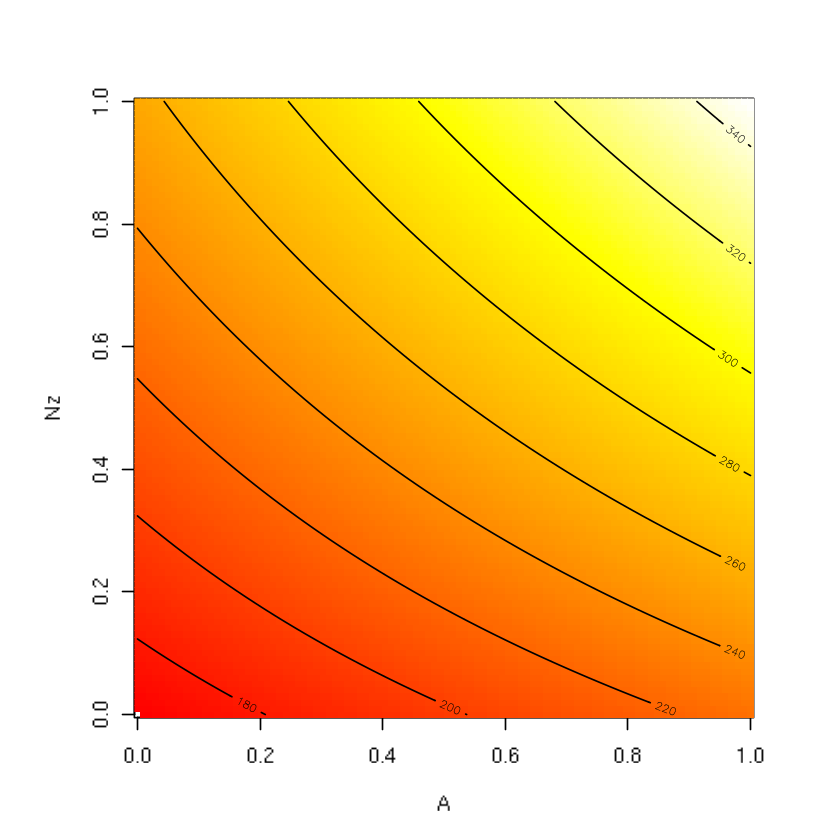

In [39]:
par(pty="s")
image(x, x, matrix(p$mean, ncol=length(x)), col=cs, breaks=bs, xlab="A", ylab="Nz")
contour(x, x, matrix(p$mean, ncol=length(x)), add=TRUE)


In [40]:
meq1 <- meq2 <- me <- matrix(NA, nrow=length(x), ncol=ncol(X))
for (i in 1:ncol(me)) {
  XX <- data.frame(baseline)[1:length(x),]
  XX[,i] <- x
  p <- predGPsep(fit.gp, XX, lite=TRUE)
  me[,i] <- p$mean
  meq1[,i] <- qt(0.05, p$df)*sqrt(p$s2) + p$mean
  meq2[,i] <- qt(0.95, p$df)*sqrt(p$s2) + p$mean
}


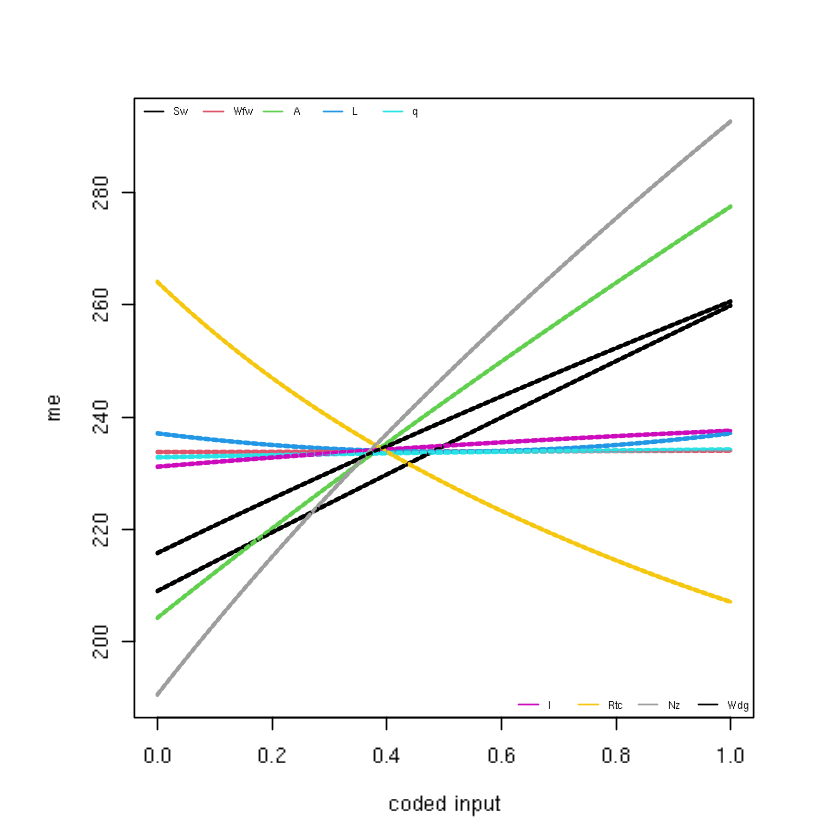

In [41]:
par(pty="s")
matplot(x, me, type="l", lwd=2, lty=1, col=1:9, xlab="coded input")
matlines(x, meq1, type="l", lwd=2, lty=2, col=1:9)
matlines(x, meq2, type="l", lwd=2, lty=2, col=1:9)
legend("topleft", names(X)[1:5], lty=1, col=1:5, horiz=TRUE, bty="n", cex=0.5)
legend("bottomright", names(X)[6:9], lty=1, col=6:9, horiz=TRUE, bty="n", cex=0.5)


# Homework exercises

## Regression


In [49]:
wire <- read.csv("data/wire.csv")
wire


pstren,dieh,posth,looph,wlen,diew,postw
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.0,5.2,19.6,29.6,94.9,2.1,2.3
8.3,5.2,19.8,32.4,89.7,2.1,1.8
8.5,5.8,19.6,31.0,96.2,2.0,2.0
8.8,6.4,19.4,32.4,95.6,2.2,2.1
9.0,5.8,18.6,28.6,86.5,2.0,1.8
9.3,5.2,18.8,30.6,84.5,2.1,2.1
9.3,5.6,20.4,32.4,88.8,2.2,1.9
9.5,6.0,19.0,32.6,85.7,2.1,1.9
9.8,5.2,20.8,32.2,93.6,2.3,2.1


In [50]:
wire_min <- unlist(lapply(wire, min))
wire_med <- unlist(lapply(wire, median))
wire_max <- unlist(lapply(wire, max))
wire_table <- as.data.frame(t(rbind(wire_min, wire_med, wire_max)))
colnames(wire_table) <- c("med", "min", "max")
wire_table


,med,min,max
,<dbl>,<dbl>,<dbl>
pstren,8.0,10.0,12.5
dieh,5.2,5.8,6.4
posth,17.0,19.6,20.8
looph,28.6,32.4,35.4
wlen,83.0,86.9,96.2
diew,1.9,2.1,2.3
postw,1.6,1.9,2.3


In [51]:
scaler_minmax <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}

X <- as.data.frame(apply(wire[,2:7], 2, scaler_minmax))
X


dieh,posth,looph,wlen,diew,postw
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.0000000,0.6842105,0.1470588,0.90151515,0.50,1.0000000
0.0000000,0.7368421,0.5588235,0.50757576,0.50,0.2857143
0.5000000,0.6842105,0.3529412,1.00000000,0.25,0.5714286
1.0000000,0.6315789,0.5588235,0.95454545,0.75,0.7142857
0.5000000,0.4210526,0.0000000,0.26515152,0.25,0.2857143
0.0000000,0.4736842,0.2941176,0.11363636,0.50,0.7142857
0.3333333,0.8947368,0.5588235,0.43939394,0.75,0.4285714
0.6666667,0.5263158,0.5882353,0.20454545,0.50,0.4285714
0.0000000,1.0000000,0.5294118,0.80303030,1.00,0.7142857


In [52]:
Y <- wire[,1]
Y


[1]  8.0  8.3  8.5  8.8  9.0  9.3  9.3  9.5  9.8 10.0 10.3 10.5 10.8 11.0 11.3
[16] 11.5 11.8 12.3 12.5

In [53]:
fit_lm1 <- lm(Y ~ ., data = data.frame(Y, X))
fit_lm1



Call:
lm(formula = Y ~ ., data = data.frame(Y, X))

Coefficients:
(Intercept)         dieh        posth        looph         wlen         diew  
    8.54118      0.77332     -0.03959      3.43162     -1.57958     -0.98471  
      postw  
    1.05309  


In [54]:
fit_lm2 <- lm(Y ~ .^2, data = data.frame(Y, X))
fit_lm2



Call:
lm(formula = Y ~ .^2, data = data.frame(Y, X))

Coefficients:
(Intercept)         dieh        posth        looph         wlen         diew  
     82.446     -121.156       -8.309      -30.801       -8.312      -43.693  
      postw   dieh:posth   dieh:looph    dieh:wlen    dieh:diew   dieh:postw  
    -78.966       36.782      157.795        4.199      -37.495       73.200  
posth:looph   posth:wlen   posth:diew  posth:postw   looph:wlen   looph:diew  
   -112.339       23.357       68.263       20.415      -25.586       27.571  
looph:postw    wlen:diew   wlen:postw   diew:postw  
     34.101           NA           NA           NA  


In [55]:
fit_lm1_step <- step(fit_lm1, scope=formula(fit_lm1), direction="backward", 
  k=2, trace=0)
fit_lm1_step



Call:
lm(formula = Y ~ looph + wlen, data = data.frame(Y, X))

Coefficients:
(Intercept)        looph         wlen  
      8.973        3.477       -1.639  


In [56]:
fit_gp <- newGPsep(X, Y, 2, 1e-6, dK=TRUE)
mle <- mleGPsep(fit_gp)


In [57]:
x <- seq(0, 1, length=101)
g <- expand.grid(x, x)

b <- unlist(lapply(X, median))

baseline <- matrix(rep(b, nrow(g)), ncol=ncol(X), byrow=TRUE)
head(baseline)
nrow(baseline)


0.5,0.6842105,0.5588235,0.2954545,0.5,0.4285714
0.5,0.6842105,0.5588235,0.2954545,0.5,0.4285714
0.5,0.6842105,0.5588235,0.2954545,0.5,0.4285714
0.5,0.6842105,0.5588235,0.2954545,0.5,0.4285714
0.5,0.6842105,0.5588235,0.2954545,0.5,0.4285714
0.5,0.6842105,0.5588235,0.2954545,0.5,0.4285714


[1] 10201

In [58]:
XX <- data.frame(baseline)
names(XX) <- names(X)
XX$dieh <- g[, 1]
XX$posth <- g[, 2]
XX


dieh,posth,looph,wlen,diew,postw
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00,0,0.5588235,0.2954545,0.5,0.4285714
0.01,0,0.5588235,0.2954545,0.5,0.4285714
0.02,0,0.5588235,0.2954545,0.5,0.4285714
0.03,0,0.5588235,0.2954545,0.5,0.4285714
0.04,0,0.5588235,0.2954545,0.5,0.4285714
0.05,0,0.5588235,0.2954545,0.5,0.4285714
0.06,0,0.5588235,0.2954545,0.5,0.4285714
0.07,0,0.5588235,0.2954545,0.5,0.4285714
0.08,0,0.5588235,0.2954545,0.5,0.4285714


In [59]:
p <- predGPsep(fit_gp, XX, lite=TRUE)



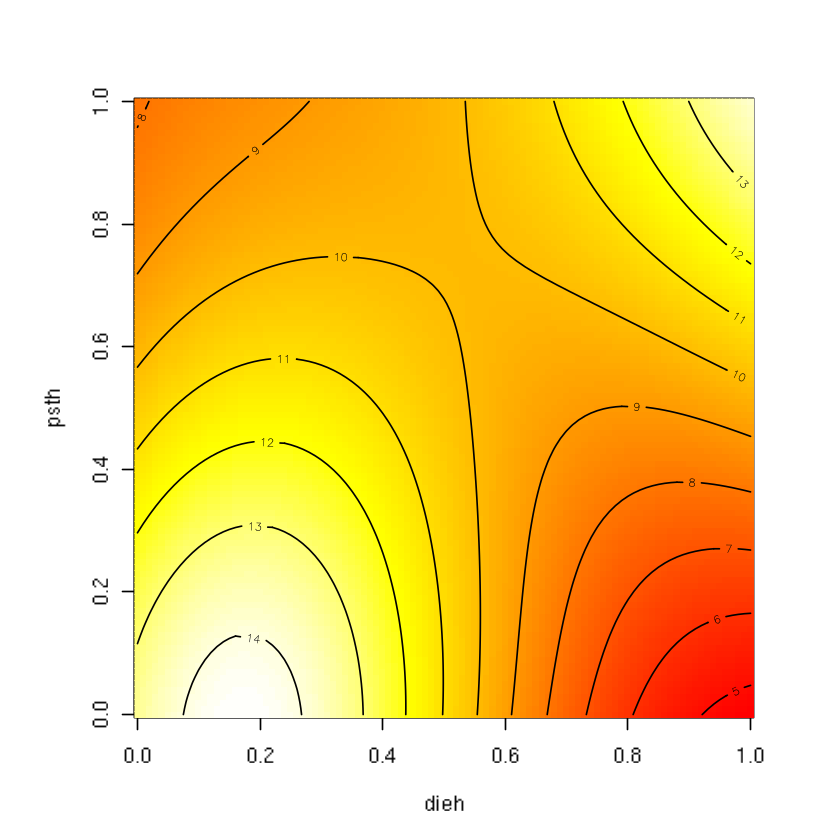

In [60]:
par(pty="s")
cs <- heat.colors(128)
#bs <- seq(, 20, length=129)
image(x, x, matrix(p$mean, ncol=length(x)), col=cs, #breaks=bs, 
  xlab="dieh", ylab="psth")
contour(x, x, matrix(p$mean, ncol=length(x)), add=TRUE)
